In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [6]:
features = ["Age", "Gender", "Total Bilirubin", "Direct Bilirubin", "Alkphos Alkaline Phosphotase", "Sgpt Alamine Aminotransferase", "Sgot Aspartate Aminotransferase", "Total Protiens", "Albumin", "Albumin-Globulin Ratio", "Selector"]
dataset = pd.read_csv('dataset.csv', names = features)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                                583 non-null int64
Gender                             583 non-null object
Total Bilirubin                    583 non-null float64
Direct Bilirubin                   583 non-null float64
Alkphos Alkaline Phosphotase       583 non-null int64
Sgpt Alamine Aminotransferase      583 non-null int64
Sgot Aspartate Aminotransferase    583 non-null int64
Total Protiens                     583 non-null float64
Albumin                            583 non-null float64
Albumin-Globulin Ratio             579 non-null float64
Selector                           583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
labelEncoder = preprocessing.LabelEncoder()

# rzutowanie płci na inta
labelEncoder.fit(['Male','Female'])
dataset.loc[:,'Gender'] = labelEncoder.transform(dataset['Gender'])

# usunięcie pacjentów z brakującymi cechami
dataset = dataset.dropna(how = 'any', axis = 0)

# Kolumna Selector: 0 => zdrowy, 1 => chory
dataset['Selector'] = dataset['Selector'].map({2:0, 1:1})

In [8]:
dataset.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
dataset.describe()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin-Globulin Ratio,Selector
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Selector',axis=1), dataset['Selector'], test_size = 0.2, random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test)

In [12]:
print("Liczba chorych pacjentów:", dataset['Selector'].value_counts().iloc[0])
print("Liczba zdrowych pacjenów:", dataset['Selector'].value_counts().iloc[1])

Liczba chorych pacjentów: 414
Liczba zdrowych pacjenów: 165


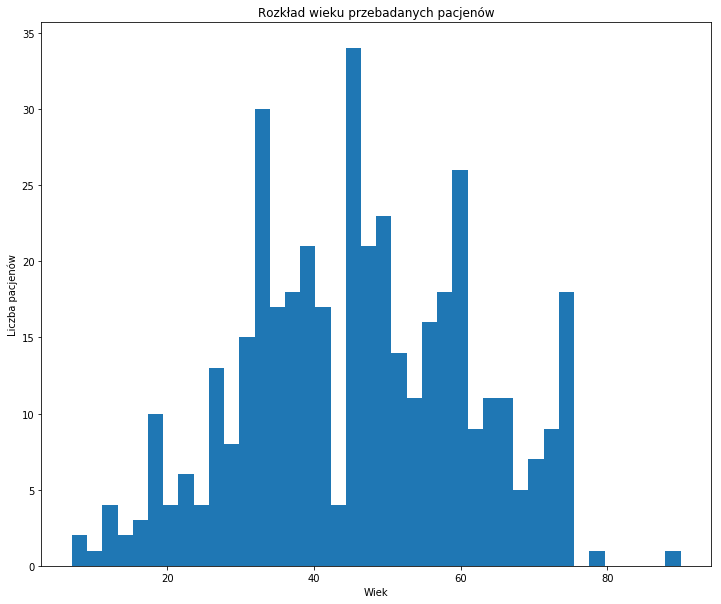

In [13]:
plt.figure(figsize=(12, 10))
plt.hist(dataset[dataset['Selector'] == 1]['Age'], bins = 40)
plt.xlabel('Wiek')
plt.ylabel('Liczba pacjenów')
plt.title('Rozkład wieku przebadanych pacjenów')
plt.show()

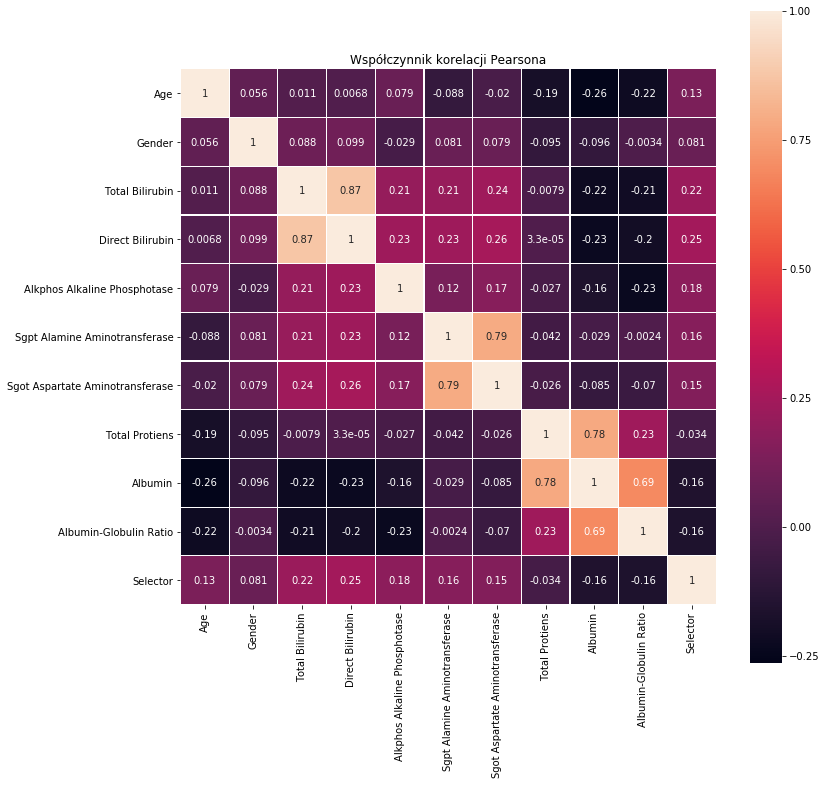

In [14]:
plt.subplots(figsize=(12, 12))
plt.title('Współczynnik korelacji Pearsona')
sns.heatmap(dataset.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [18]:
optimizer = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

In [19]:
network = Sequential()
network.add(Dense(256, activation = 'relu', input_dim = 10))
network.add(Dense(units = 1, activation = 'sigmoid'))
network.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
history = network.fit(X_train_scaled, y_train, batch_size = 40, epochs = 20)

Epoch 1/20
463/463 [==============================] - 1s 2ms/step - loss: 0.6213 - acc: 0.7171
Epoch 2/20
463/463 [==============================] - 0s 110us/step - loss: 0.5795 - acc: 0.7171
Epoch 3/20
463/463 [==============================] - 0s 105us/step - loss: 0.5683 - acc: 0.7171
Epoch 4/20
463/463 [==============================] - 0s 177us/step - loss: 0.5593 - acc: 0.7171
Epoch 5/20
463/463 [==============================] - 0s 279us/step - loss: 0.5536 - acc: 0.7171
Epoch 6/20
463/463 [==============================] - 0s 178us/step - loss: 0.5466 - acc: 0.7171
Epoch 7/20
463/463 [==============================] - 0s 184us/step - loss: 0.5407 - acc: 0.7171
Epoch 8/20
463/463 [==============================] - 0s 109us/step - loss: 0.5357 - acc: 0.7171
Epoch 9/20
463/463 [==============================] - 0s 113us/step - loss: 0.5307 - acc: 0.7171
Epoch 10/20
463/463 [==============================] - 0s 122us/step - loss: 0.5264 - acc: 0.7171
Epoch 11/20
463/463 [==========

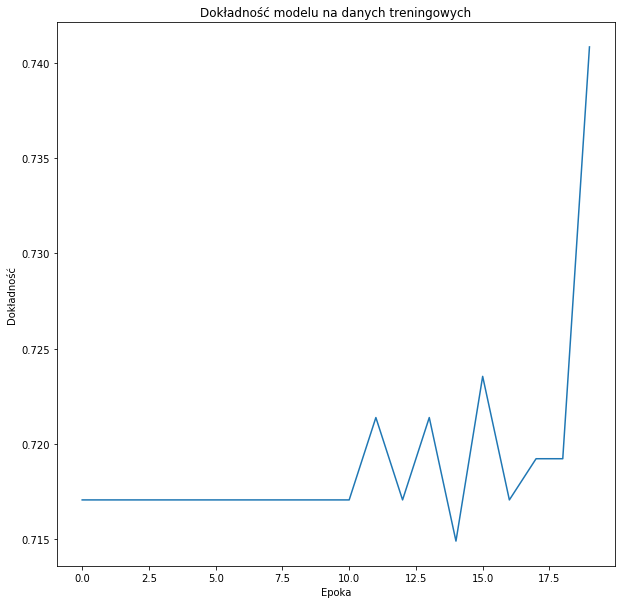

In [21]:
plt.subplots(figsize=(10, 10))
plt.plot(history.history['acc'])
plt.title('Dokładność modelu na danych treningowych')
plt.ylabel('Dokładność')
plt.xlabel('Epoka')
plt.show()

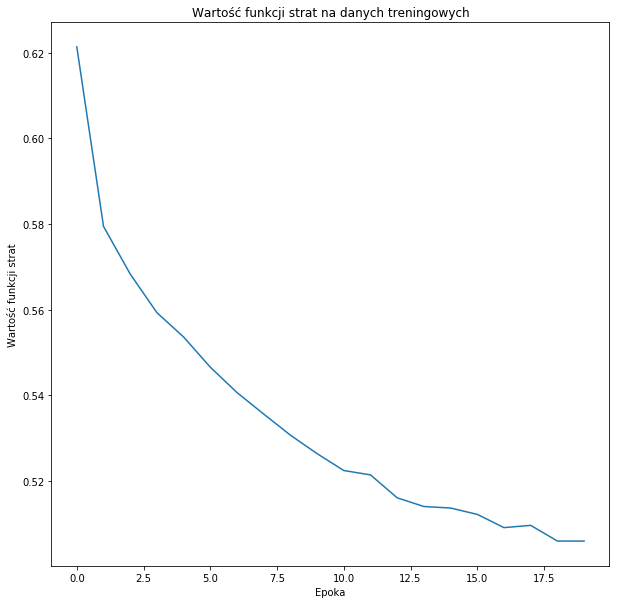

In [22]:
plt.subplots(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.title('Wartość funkcji strat na danych treningowych')
plt.ylabel('Wartość funkcji strat')
plt.xlabel('Epoka')
plt.show()

In [23]:
y_pred = network.predict(X_test_scaled)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.70      0.99      0.82        82

   micro avg       0.70      0.70      0.70       116
   macro avg       0.35      0.49      0.41       116
weighted avg       0.50      0.70      0.58       116



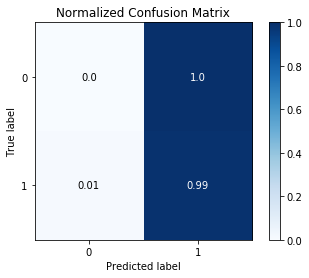

In [25]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)